In [1]:
cd /Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project

/Users/prasanna/UNCC_stuff/6162-KnowledgeDiscoveryInDatabases/Project


### Read CSV and look at the data and summary

In [3]:
import pandas as pd
stud_df = pd.read_csv('student-mat.csv')
print(stud_df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [4]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
stud_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


#### Avgscore - New Attribute
add a new attribute avgscore taking the average of G1, G2 and G3.  We'll use this as our target for all data exploration tasks.

In [6]:
stud_df["avgscore"] = ((stud_df["G1"] + stud_df["G2"] + stud_df["G3"])/3).round(2)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#### Checking the Distribution of the new avgscore 

<AxesSubplot:xlabel='avgscore', ylabel='Count'>

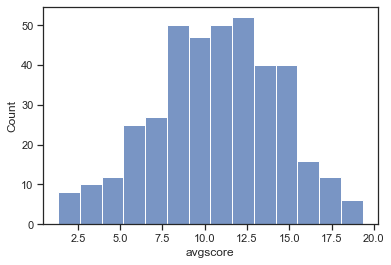

In [8]:
sns.histplot(stud_df.avgscore)

#### Binary classification attribute
Taking a Binary Classification approach, code avgscore < 10 as 0 and avgscore > 10 as 1
This attribute y_binary is only required for predictive modeling.  We dont need to use this for Data exploration purposes.

In [9]:
import numpy as np
stud_df["y_binary"] = np.array((stud_df["avgscore"] > 10) + 0)

### Create file for the data exploration activity and share with the team.

In [10]:
stud_df.to_csv('student-mat-v1.csv', index=False)

## Data Preparation for Modeling
### Datatype Transformation
Ordinal encoding for the first set of transformation and
one hot encoding for the Fjob, Mjob, reason and guardian attributes.

In [11]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
def ordinal_encode(series, categories):
  encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
  return encoder.fit_transform(series.values.reshape(-1, 1))

In [13]:
categories_ordenc = {"school": [["GP","MS"]],
                     "sex": [["F", "M"]],
                     "address": [["R", "U"]],
                     "famsize": [["LE3", "GT3"]],
                     "Pstatus": [['A', 'T']],
                     "schoolsup": [["no", "yes"]],
                     "famsup": [["no", "yes"]],
                     "paid": [["no", "yes"]],
                     "activities": [["no", "yes"]],
                     "nursery": [["no", "yes"]],
                     "higher": [["no", "yes"]],
                     "internet": [["no", "yes"]],
                     "romantic": [["no", "yes"]],
                     }

for column, category in categories_ordenc.items():
  stud_df[column] = ordinal_encode(stud_df[column], category)

In [14]:
def onehot_encode(data, column, categories):
  encoder = OneHotEncoder(categories=categories, drop="first", sparse=False, dtype=np.int64)
  encoded_features = encoder.fit_transform(data[column].values.reshape(-1, 1))
  encoder.transform(data[column].values.reshape(-1, 1))

  data = data.drop(labels=column, axis=1)

  for j, category in enumerate(categories[0][1:]):
    category_column_name = "{}_{}".format(column, category)
    data[category_column_name] = encoded_features[:, j]

  return data

In [15]:
categories_hotenc = {"Fjob": [["other", "teacher", "health", "services", 'at_home']],
                     "Mjob": [["other", "teacher", "health", "services", 'at_home']],
                     "reason": [["other", "home", "reputation", "course"]],
                     "guardian": [["other", "mother", "father"]]}

for column, category in categories_hotenc.items():
  stud_df = onehot_encode(stud_df, column, category)

In [16]:
stud_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
0,0,0,18,1,1,0,4,4,2,2,...,0,0,0,0,1,0,0,1,1,0
1,0,0,17,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,1
2,0,0,15,1,0,1,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,1,1,4,2,1,3,...,0,0,1,0,0,1,0,0,1,0
4,0,0,16,1,1,1,3,3,1,2,...,0,0,0,0,0,1,0,0,0,1
5,0,1,16,1,0,1,4,3,1,2,...,0,0,0,1,0,0,1,0,1,0
6,0,1,16,1,0,1,2,2,1,2,...,0,0,0,0,0,1,0,0,1,0
7,0,0,17,1,1,0,4,4,2,2,...,0,0,0,0,0,1,0,0,1,0
8,0,1,15,1,0,0,3,2,1,2,...,0,0,0,1,0,1,0,0,1,0
9,0,1,15,1,1,1,3,4,1,2,...,0,0,0,0,0,1,0,0,1,0


### Dropping columns
G1, G2 and G3 introduce multicollinearity if retained.  Also avgscore and y_binary were derived from it.
Lastly avgscore is also not required as we will be using the y_binary for the classification models as the target variable.
The age attribute is almost irrelevant for this use case as we're looking at students who are of almost same age group and who study in the same class and year. Even if is has any statistical significance, it would be misleading.

In [17]:
stud_df = stud_df.drop(['age','G1','G2','G3','avgscore'], axis=1)

### Training and Test Data splits
Using 70-30 ratio for train and test data sets.
y_binary is the target variable.

In [18]:
from sklearn.model_selection import train_test_split
X = stud_df.drop(['y_binary'], axis=1)
y = stud_df['y_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
X_train

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
348,0,0,1,1,1,4,3,1,3,0,...,0,0,1,0,0,0,1,0,1,0
59,0,0,1,1,1,4,2,1,2,0,...,0,0,0,1,0,0,0,1,1,0
120,0,0,1,1,1,1,2,1,2,0,...,0,0,0,0,1,0,0,1,1,0
12,0,1,1,0,1,4,4,1,1,0,...,0,0,1,0,0,0,0,1,0,1
306,0,1,1,1,0,3,2,1,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,1,1,2,2,1,1,0,...,0,0,0,0,0,0,1,0,1,0
255,0,1,1,0,1,1,1,2,1,1,...,0,0,1,0,0,0,0,1,1,0
72,0,0,0,1,1,1,1,1,2,2,...,0,0,0,0,0,0,1,0,1,0
235,0,1,1,1,1,3,2,2,3,0,...,0,0,0,0,1,0,1,0,1,0


In [20]:
X_test

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_at_home,Mjob_teacher,Mjob_health,Mjob_services,Mjob_at_home,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father
146,0,0,1,1,1,3,2,1,2,3,...,0,0,1,0,0,1,0,0,0,1
379,1,0,0,1,1,3,1,1,2,0,...,0,0,0,0,1,0,1,0,1,0
247,0,1,1,1,1,3,1,1,1,3,...,0,0,0,1,0,0,0,0,1,0
197,0,1,0,0,1,3,3,3,1,0,...,0,1,0,0,0,1,0,0,0,1
368,1,0,1,1,1,2,3,2,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,1,1,1,1,3,2,2,1,1,...,0,0,0,1,0,0,0,1,1,0
39,0,0,0,1,1,2,2,1,1,0,...,0,0,0,0,1,0,1,0,1,0
163,0,1,1,1,1,1,3,1,1,0,...,0,0,0,0,1,0,0,1,0,1
132,0,0,1,0,1,2,2,1,1,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
y_train

348    1
59     1
120    1
12     1
306    1
      ..
203    0
255    0
72     0
235    0
37     1
Name: y_binary, Length: 276, dtype: int64

In [22]:
y_test

146    0
379    0
247    0
197    0
368    1
      ..
250    0
39     1
163    0
132    1
284    0
Name: y_binary, Length: 119, dtype: int64

## Modeling
since y_binary is a binary attribute, i'm planning to use the below classificaiton models.
1. Decision Trees
2. Logistic Regression
3. Naive Bayes Classifier

The plan is to measure the Accuracy, Precision, F1, Recall and ROC/AUC values to evaluate the performance and identify feature importance for the best model.

### Decision Tree Classifier
AUC socre results as 0.529

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier();
clf_tree.fit(X_train, y_train.values.ravel());

y_pred_tree = clf_tree.predict(X_test)

from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree:  0.529276693455798


### Logistic Regression Classifier
AUC socre results as 0.721

In [32]:
from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(max_iter=200);
clf_reg.fit(X_train, y_train.values.ravel());

y_pred_reg = clf_reg.predict(X_test)
print('roc_auc_score for Logistic regression: ', roc_auc_score(y_test, y_pred_reg))

roc_auc_score for Logistic regression:  0.7214408725602757


### Naive Bayes Classifier
AUC socre results as 0.638

In [27]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB();
clf_nb.fit(X_train, y_train.values.ravel());

y_pred_nb = clf_nb.predict(X_test)
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred_nb))

roc_auc_score for Naive Bayes:  0.6382032146957519


## Evaluation Metrics Derivation
I'm creating a reusable function for deriving the performance evaluation metrics so that they can be used against all the 3 models.

In [34]:
from sklearn.model_selection import cross_val_score
from statistics import mean

def print_metrics(model, X, y, folds):
    acc = mean(cross_val_score(model, X, y, cv=folds, scoring='accuracy'))
    f1 = mean(cross_val_score(model, X, y, cv=folds, scoring='f1'))
    pr = mean(cross_val_score(model, X, y, cv=folds, scoring='precision'))
    re = mean(cross_val_score(model, X, y, cv=folds, scoring='recall'))

    print('Accuracy: {}'.format(acc))
    print('F1: {}'.format(f1))
    print('Precision: {}'.format(pr))
    print('Recall/Sensitivity: {}'.format(re))
    print('\n')

#### Print Metrics for each model.
Considering the use case here, i'm giving a higher weightage to only Accuracy and Precision from the 4 metrics here and then combining with AUC scores for comparison.

From Accuracy and Precision the ranking of the models are as below.
1. Naive Bayes
2. Logistic Regression
3. Decision Tree

In [35]:
dtree = DecisionTreeClassifier(random_state=1)
print_metrics(dtree, X, y.values.ravel(), 5)

logreg = LogisticRegression(random_state=0,max_iter=200)
print_metrics(logreg, X, y.values.ravel(), 5)

nb = GaussianNB()
print_metrics(nb, X, y.values.ravel(), 5)

Accuracy: 0.5949367088607594
F1: 0.6307738019178956
Precision: 0.6341560027274313
Recall/Sensitivity: 0.6298097251585624


Accuracy: 0.6430379746835443
F1: 0.6854021204036026
Precision: 0.6685131013005577
Recall/Sensitivity: 0.7084566596194503


Accuracy: 0.660759493670886
F1: 0.7085532439584428
Precision: 0.6719294724164888
Recall/Sensitivity: 0.7645877378435518




### Results capture in Tables
Capture the performance metrices and ROC/AUC results in a table so that it can be used for plotting and feature importance.

In [86]:
classifiers = [LogisticRegression(max_iter=200), 
               DecisionTreeClassifier(),
               GaussianNB()]
result_table = pd.DataFrame(columns=['classifiers', 'accuracy', 'f1','precision','recall','fpr','tpr','auc'])

In [87]:
# Train the models and record the results
result_table = pd.DataFrame(data=None)
for cls in classifiers:
    model = cls.fit(X_train, y_train.values.ravel())
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    acc = mean(cross_val_score(model, X, y.values.ravel(), cv=5, scoring='accuracy'))
    f1 = mean(cross_val_score(model, X, y.values.ravel(), cv=5, scoring='f1'))
    pr = mean(cross_val_score(model, X, y.values.ravel(), cv=5, scoring='precision'))
    re = mean(cross_val_score(model, X, y.values.ravel(), cv=5, scoring='recall'))
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'accuracy' : acc,
                                        'f1': f1,
                                        'precision':pr,
                                        'recall':re,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

### ROC/AUC
ROC results indicate that the Logistic regression is a better model than the Naive Bayes.  Decision trees are very close to the 50% straight line and therefore is not a good one.

It appears that the difference between Logisitic regression and Naive bayes with Accuracy and precision are max of 0.02 but the AUC index is about 0.09.

### Considering the above justifications, We identify Logistic regression to be the best model.

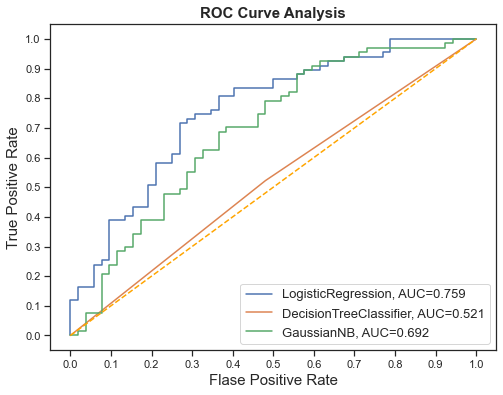

In [44]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

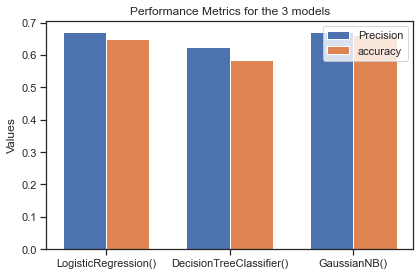

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, result_table['precision'], width, label='Precision')
rects2 = ax.bar(x+width/2, result_table['accuracy'], width, label='accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Performance Metrics for the 3 models')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#### For the logistic regression coefficients, a feature importance plot is generated below.
1. Schoolsup
2. failures 
3. MJob_health
4. sex
5. higher
are the top 5 features per logistic regression.

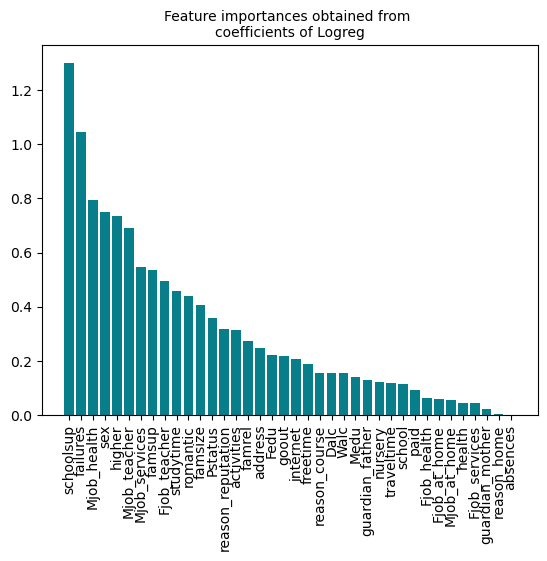

In [85]:
logreg=LogisticRegression(random_state=1, max_iter=200)
model = logreg.fit(X_train, y_train.values.ravel())

feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
fimp = feature_importance.sort_values('feature_importance',ascending=False)

plt.bar(x=fimp['feature'], height=fimp['feature_importance'], color='#087E8B')
plt.title('Feature importances obtained from \ncoefficients of Logreg', size=10)
plt.xticks(rotation='vertical')
plt.show()

#ax.barh(fimp['feature'],fimp['feature_importance'], align='center')
#ax.set_yticks(labels=fimp['feature'])
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Coefficients')
#ax.set_title('Feature importances obtained from coefficients of Logreg')
#plt.show()